In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations

folder = "../database_cleaned"

In [ ]:
jeux_clean = pd.read_csv(f'{folder}/jeux_clean.csv')
fig = plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

In [155]:
# Categories visualization
def plot_hist_counter(counter, ax, labels = False):
    """Plot histogram where X : category, Y : number of games in this category"""
    
    ax.clear()
    freqs = counter.values()
    categories = list(counter.keys())

    x_coords = np.arange(stop = len(categories))

    bars = ax.bar(x_coords, height=freqs)

    if np.nan in categories: # change NaN bar color to red
        bars[categories.index(np.nan)].set_color('r')

    if labels:
        ax.xaxis.set_visible(True)
        ax.tick_params(axis='x', labelrotation=90)
        ax.set_xticklabels(categories)
        ax.xaxis.set_major_locator(plt.FixedLocator(x_coords))
    else:
        ax.xaxis.set_visible(False)

    return ax

def heatmap_categories(matrix_df, ax, cbarlabel):
    """Plot heatmap (2D = 2 categories) to see most common categories combinations"""
    
    ax.clear()
    heatmap = ax.imshow(matrix_df.to_numpy())
    cbar = ax.figure.colorbar(heatmap, ax=ax)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    labels = matrix_df.columns
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
    ax.tick_params(axis='x', labelrotation=90)

    ax.xaxis.set_major_locator(plt.FixedLocator(np.arange(len(labels))))
    ax.yaxis.set_major_locator(plt.FixedLocator(np.arange(len(labels))))


/var/folders/dp/qpw35dg90hv8n0247r1klh4c0000gn/T/ipykernel_4971/1274608561.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories)


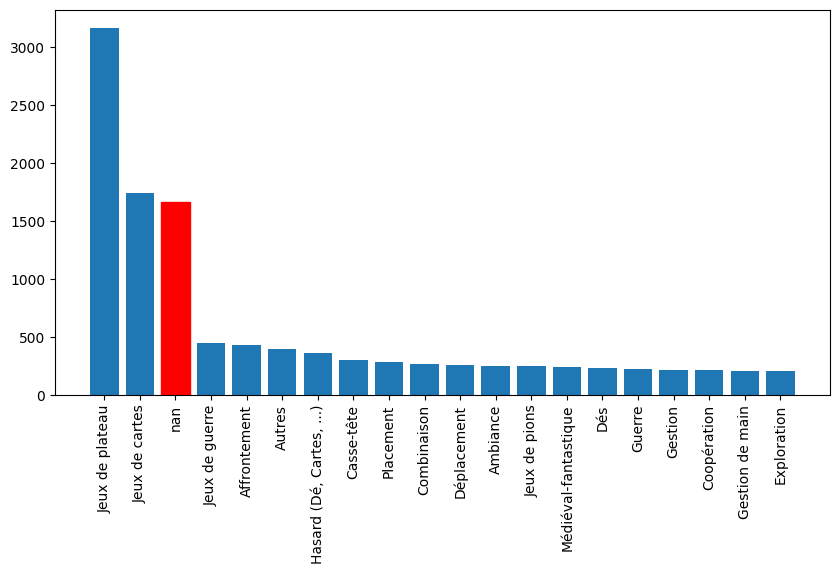

In [156]:
# Categories histogram (20 most common)
categories_counter = Counter([cat for cats in jeux_clean["Type"][~jeux_clean["Type"].isna()].str.split('|') for cat in cats])
categories_counter[np.nan] = jeux_clean["Type"].isnull().sum() # count Nan

categories_common = dict(categories_counter.most_common(20))

fig.clear()
ax = plot_hist_counter(categories_common, fig.add_subplot(111), labels=True)
fig

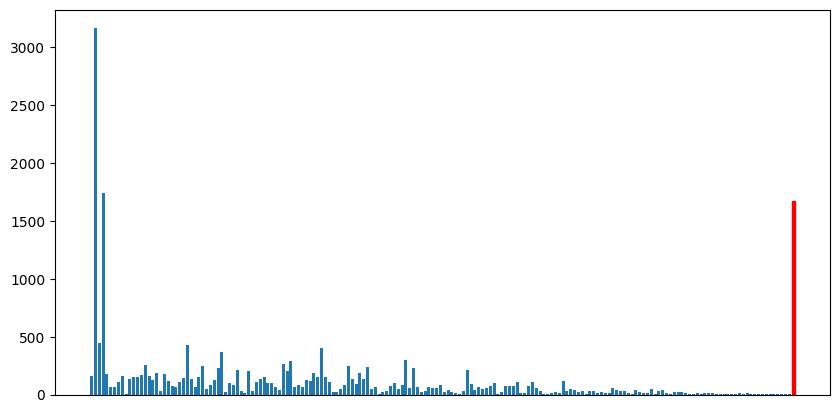

In [157]:
# Categories histogram (all 183 categories)
# categories_common = dict(categories_counter.most_common(100))
fig.clear()
ax = plot_hist_counter(categories_counter, fig.add_subplot(111), labels=False)
fig


In [162]:
# Create matrix (= dataframe) for heatmap (20 most common categories)
categories_df = jeux_clean.loc[~jeux_clean["Type"].isna(), "Type"].str.split('|')

top_categories = dict(categories_counter.most_common(20)) # top N categories
pair_categories = Counter([pair for cats in categories_df for pair in combinations(sorted(cats), 2)])

nb_categories = len(categories_counter)
heatmap_matrix = pd.DataFrame(data=0, index=top_categories.keys(), columns=top_categories)

for (cat1, cat2), count in pair_categories.items():
    if cat1 in heatmap_matrix and cat2 in heatmap_matrix.columns:
        heatmap_matrix.loc[cat1, cat2] += count
    if cat2 in heatmap_matrix and cat1 in heatmap_matrix.columns:
        heatmap_matrix.loc[cat2, cat1] += count
heatmap_matrix

,Jeux de plateau,Jeux de cartes,NaN,Jeux de guerre,Affrontement,Autres,"Hasard (Dé, Cartes, ...)",Casse-tête,Placement,Combinaison,Déplacement,Ambiance,Jeux de pions,Médiéval-fantastique,Dés,Guerre,Gestion,Coopération,Gestion de main,Exploration
Jeux de plateau,0,38,0,15,68,6,68,3,73,31,70,20,10,40,43,30,52,32,17,41
Jeux de cartes,38,0,0,2,47,8,34,0,16,36,9,29,3,41,12,16,5,21,36,10
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jeux de guerre,15,2,0,0,46,0,17,0,3,0,8,0,0,5,6,63,1,2,5,0
Affrontement,68,47,0,46,0,4,104,0,44,42,71,41,1,75,69,146,27,33,61,34
Autres,6,8,0,0,4,0,4,1,2,2,0,7,1,1,2,1,0,3,0,1
"Hasard (Dé, Cartes, ...)",68,34,0,17,104,4,0,0,38,50,63,50,1,58,69,50,26,47,42,54
Casse-tête,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Placement,73,16,0,3,44,2,38,0,0,39,42,9,4,23,33,26,47,6,28,26
Combinaison,31,36,0,0,42,2,50,0,39,0,13,18,1,27,39,13,52,18,51,20


/var/folders/dp/qpw35dg90hv8n0247r1klh4c0000gn/T/ipykernel_4971/1274608561.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/var/folders/dp/qpw35dg90hv8n0247r1klh4c0000gn/T/ipykernel_4971/1274608561.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


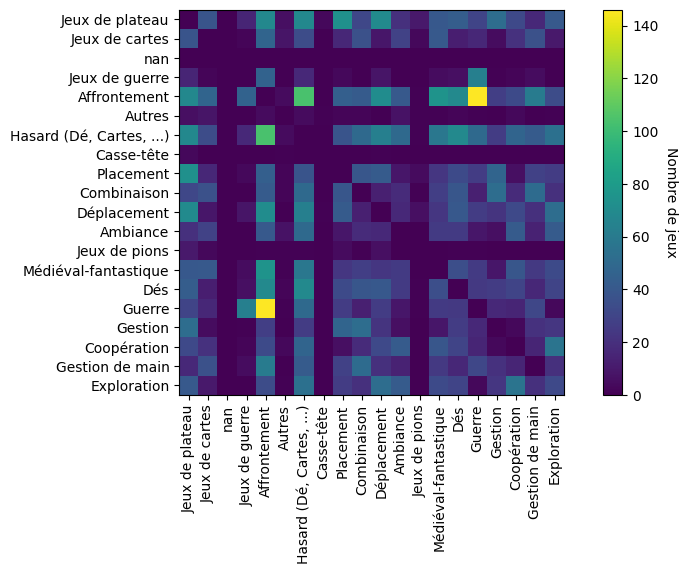

In [163]:
fig.clear()
ax = heatmap_categories(heatmap_matrix, fig.add_subplot(111), "Nombre de jeux")
fig

In [130]:
fig.clear()